In [1]:
# import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# import data set 
dataset=pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Salary.xlsx")
dataset.head(2)

,Level,Salary
0,1,1500
1,2,2000


<function matplotlib.pyplot.show(close=None, block=None)>

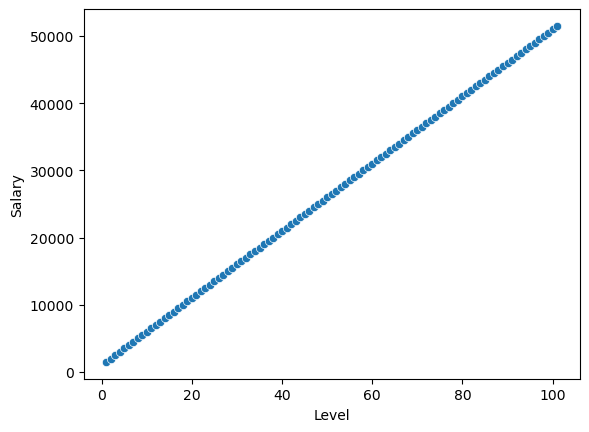

In [9]:
# See which type of function it is relate of 
sns.scatterplot(x=dataset["Level"],y=dataset["Salary"],data=dataset)
plt.show

In [11]:
# Checking Null values 
dataset.isnull().sum()

Level     0
Salary    0
dtype: int64

In [21]:
# Checking Outliers 
q1=dataset["Salary"].quantile(0.25)
q3=dataset["Salary"].quantile(0.75)
IQR=q3-q1

In [25]:
Min_range=q1-(1.5*IQR)
Max_range=q3+(1.5*IQR)
Min_range,Max_range

(-23500.0, 76500.0)

In [29]:
dataset=dataset[dataset["Salary"]<Max_range]

In [63]:
x=dataset[["Level"]]
y=dataset[["Salary"]]

In [65]:
# Break the dataset into train and test
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50)

In [69]:
# Now import the linear regression 
from sklearn.linear_model import LinearRegression

In [71]:
lr=LinearRegression()

In [76]:
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
lr.score(x_test,y_test)*100

100.0

In [86]:
lr.predict([[115]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[58500.]])

In [94]:
y_prd=lr.predict(x)

AttributeError: module 'matplotlib.pyplot' has no attribute 'labels'

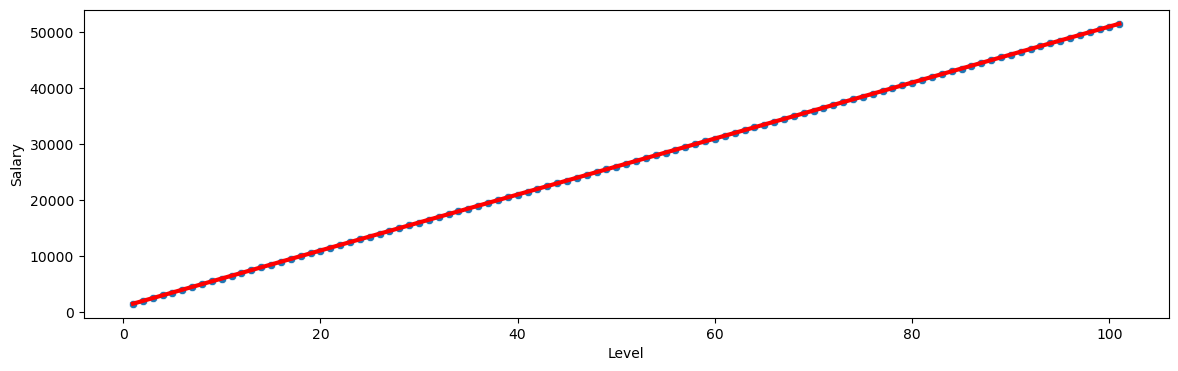

In [112]:
plt.figure(figsize=(14,4))
sns.scatterplot(x=dataset["Level"],y=dataset["Salary"],data=dataset)
plt.plot(dataset["Level"],y_prd,c='red',linewidth=3)
plt.show()